In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Toronto(2).csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188712
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [3]:
list(dict.fromkeys(df['Borough']))

['Scarborough',
 'North York',
 'East York',
 'East Toronto',
 'Central Toronto',
 'Downtown Toronto',
 'York',
 'West Toronto',
 'Mississauga',
 'Etobicoke',
 "Queen's Park"]

### I would like to focus on Borough that contains the word ' Toronto' eg Central Toronto, East Toronto, etc

In [4]:
df1 = df.loc[df['Borough'].str.contains('Toronto')]
df1 = df1.reset_index(drop=True)
print(list(dict.fromkeys(df1['Borough'])))
print(len(df1['Latitude']))

['East Toronto', 'Central Toronto', 'Downtown Toronto', 'West Toronto']
39


### Next, I would like to create a map of Ontorio, Canada which the latitude and longitude = 43.651890,-79.381710

In [5]:
import folium

In [6]:
m = folium.Map(location = [43.651890,-79.381710],zoom_start = 10.2)

for i in range(0,39):
    folium.CircleMarker(location = [df.iloc[i,3],df.iloc[i,4]], popup = df.iloc[i,1], fill_color = 'green',
                       radius = 8, color = 'green', fill = True).add_to(m)
m

# 1) Prepare the data

### Foursquare API details

In [7]:
CLIENT_ID = 'FRX04MZEHPMJNQPIZMVQ34OYKIKOLY2L3TLFZ5H3JPVTBYM4' # your Foursquare ID
CLIENT_SECRET = 'NOE0MPV5WLPQ4QVRQRUQUTWIHWQDJDVJ4OIZAIVAJJHXUGL5' # your Foursquare Secret
VERSION = '20200129'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentials:
CLIENT_ID: FRX04MZEHPMJNQPIZMVQ34OYKIKOLY2L3TLFZ5H3JPVTBYM4
CLIENT_SECRET:NOE0MPV5WLPQ4QVRQRUQUTWIHWQDJDVJ4OIZAIVAJJHXUGL5


In [8]:
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,CLIENT_SECRET,VERSION,df1.iloc[10,3],df1.iloc[10,4],radius,LIMIT) 


In [9]:
import json
import requests

In [10]:
data = requests.get(url).json()
data

{'meta': {'code': 200, 'requestId': '5e32e983dd0f85001bdeb050'},
 'response': {'headerLocation': 'Rosedale',
  'headerFullLocation': 'Rosedale, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.684063004500004,
    'lng': -79.3713183827023},
   'sw': {'lat': 43.6750629955, 'lng': -79.38373961729772}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aff2d47f964a520743522e3',
       'name': 'Rosedale Park',
       'location': {'address': '38 Scholfield Ave.',
        'crossStreet': 'at Edgar Ave.',
        'lat': 43.68232820227814,
        'lng': -79.37893434347683,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.68232820227814,
          'lng': -79.37893434347683}],
        'distance':

In [11]:
print(data['response']['headerLocation'],'\n',data['response']['groups'][0]['items'][0]['venue']['name'])

Rosedale 
 Rosedale Park


In [12]:
radius = 500
LIMIT = 100

venues = []

for name, latitude, longitude in zip(df1['Neighbourhood'],df1['Latitude'],df1['Longitude']):
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,CLIENT_SECRET,VERSION,latitude,longitude,radius,LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            name, 
            latitude, 
            longitude, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
    

In [13]:
new_df = pd.DataFrame(venues,columns = ['Neighbourhood','Neighbourhood lat',
                                     'Neighbourhood long','Venue Name','Venue lat',
                                    'Venue long','Category'])
new_df

,Neighbourhood,Neighbourhood lat,Neighbourhood long,Venue Name,Venue lat,Venue long,Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
...,...,...,...,...,...,...,...
1694,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,The Ashbridge Estate,43.664691,-79.321805,Garden
1695,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,TTC Russell Division,43.664908,-79.322560,Light Rail Station
1696,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,The Ten Spot,43.664815,-79.324213,Spa
1697,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,Revolution Recording,43.662561,-79.326940,Recording Studio


In [14]:
new_df.groupby(['Neighbourhood']).count()

,Neighbourhood lat,Neighbourhood long,Venue Name,Venue lat,Venue long,Category
Neighbourhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"Brockton, Exhibition Place, Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,15,15,15,15,15,15
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",17,17,17,17,17,17
"Cabbagetown, St. James Town",43,43,43,43,43,43
Central Bay Street,83,83,83,83,83,83
"Chinatown, Grange Park, Kensington Market",86,86,86,86,86,86
Christie,18,18,18,18,18,18


In [15]:
cat = list(dict.fromkeys(new_df['Category']))
print(len(cat))
print(cat[:10])

232
['Trail', 'Health Food Store', 'Pub', 'Neighborhood', 'Greek Restaurant', 'Cosmetics Shop', 'Italian Restaurant', 'Ice Cream Shop', 'Brewery', 'Yoga Studio']


# 2) Analyze the data

### One Hot Encode using pd.get_dummies

In [16]:
one_hot = pd.get_dummies(new_df['Category'])
one_hot

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
temp = new_df.iloc[:,0:3]
merged = pd.concat([temp,one_hot], axis =1)
merged

,Neighbourhood,Neighbourhood lat,Neighbourhood long,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,43.676357,-79.293031,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,43.676357,-79.293031,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,43.676357,-79.293031,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,43.676357,-79.293031,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",43.679557,-79.352188,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1695,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1696,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
merged_avg = merged.groupby(['Neighbourhood']).mean()
merged_avg = merged_avg.reset_index(drop=False)
merged_avg = merged_avg.drop(columns=['Neighbourhood lat','Neighbourhood long'])
merged_avg

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,...,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.01,0.000000
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.018182,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.058824,0.058824,0.058824,0.117647,0.117647,0.117647,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,...,0.000000,0.00000,0.00,0.012048,0.000000,0.000000,0.012048,0.000000,0.00,0.012048
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.046512,0.000000,0.069767,0.011628,0.000000,0.00,0.000000
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Church and Wellesley,0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012195,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.012195,0.000000,0.012195,0.00,0.012195


### Now we would like to rank the top 10 most nearby venues in each Neighbourhood

In [19]:
merged_avg.shape

(39, 233)

In [47]:
#we have 232 columns which actually 1 for neighbourhood and another 231 are the nearby venues
data2 = [] 
for i in range(0,len(merged_avg.iloc[:,0])):
    data2.append([])
    for j in range(0,233):
        data2[i].append(merged_avg.iloc[i,j])

In [48]:
data2[0]

['Adelaide, King, Richmond',
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.01,
 0.02,
 0.0,
 0.0,
 0.01,
 0.02,
 0.01,
 0.0,
 0.0,
 0.04,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.02,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.01,
 0.0,
 0.01,
 0.01,
 0.0,
 0.01,
 0.0,
 0.02,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.01,
 0.0,
 0.01,
 0.0,
 0.0,
 0.01,
 0.0,
 0.01,
 0.0,
 0.01,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [49]:
header = list(merged_avg.columns.values)
header = header[1:]
header

['Afghan Restaurant',
 'Airport',
 'Airport Food Court',
 'Airport Gate',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Workshop',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Stadium',
 'Basketball Stadium',
 'Beach',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bistro',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Butcher',
 'Café',
 'Cajun / Creole Restaurant',
 'Camera Store',
 'Candy Store',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Arts Building',
 'College Auditorium',
 'College Gym',
 'Colleg

### Let's try and see the top10 most common venues on Adelaide, King, Richmond

In [50]:
h = np.array(header).reshape(-1,1)
d = np.array(data2[0][1:]).reshape(-1,1)


In [51]:
data = np.column_stack((h,d))
AKR = pd.DataFrame(data,columns = ['Venue', 'Score'])
a = AKR.sort_values(['Score'], ascending=0).reset_index(drop=True)[0:10]
a

,Venue,Score
0,Coffee Shop,0.07
1,Café,0.04
2,Steakhouse,0.04
3,Thai Restaurant,0.03
4,Restaurant,0.03
5,Bar,0.03
6,Cosmetics Shop,0.03
7,Bakery,0.03
8,Asian Restaurant,0.03
9,Pizza Place,0.02


### Let's do it to all neighbourhoods

In [52]:
result=[]
for i in range(0,len(data2)):
    score = np.array(data2[i][1:]).reshape(-1,1)
    temp_header = np.array(header).reshape(-1,1)
    
    temp_data = np.column_stack((temp_header,score))
    temp_df = pd.DataFrame(temp_data,columns=['header','score'])
    temp_df = temp_df.sort_values(['score'],ascending=0).reset_index(drop=True)[0:10]
    temp_df = temp_df.iloc[:,0]
    result.append(temp_df)
    
    print(np.array(result))

[['Coffee Shop' 'Café' 'Steakhouse' 'Thai Restaurant' 'Restaurant' 'Bar'
  'Cosmetics Shop' 'Bakery' 'Asian Restaurant' 'Pizza Place']]
[['Coffee Shop' 'Café' 'Steakhouse' 'Thai Restaurant' 'Restaurant' 'Bar'
  'Cosmetics Shop' 'Bakery' 'Asian Restaurant' 'Pizza Place']
 ['Coffee Shop' 'Cocktail Bar' 'Beer Bar' 'Seafood Restaurant'
  'Cheese Shop' 'Steakhouse' 'Café' 'Farmers Market' 'Bakery'
  'Restaurant']]
[['Coffee Shop' 'Café' 'Steakhouse' 'Thai Restaurant' 'Restaurant' 'Bar'
  'Cosmetics Shop' 'Bakery' 'Asian Restaurant' 'Pizza Place']
 ['Coffee Shop' 'Cocktail Bar' 'Beer Bar' 'Seafood Restaurant'
  'Cheese Shop' 'Steakhouse' 'Café' 'Farmers Market' 'Bakery'
  'Restaurant']
 ['Breakfast Spot' 'Café' 'Coffee Shop' 'Gym' 'Intersection' 'Stadium'
  'Nightclub' 'Furniture / Home Store' 'Bar' 'Climbing Gym']]
[['Coffee Shop' 'Café' 'Steakhouse' 'Thai Restaurant' 'Restaurant' 'Bar'
  'Cosmetics Shop' 'Bakery' 'Asian Restaurant' 'Pizza Place']
 ['Coffee Shop' 'Cocktail Bar' 'Beer Bar' '

In [53]:
nbh = np.array(merged_avg['Neighbourhood']).reshape(-1,1)
final_data = np.column_stack((nbh,result))
final_df = pd.DataFrame(final_data, columns = ['Neighbourhood','1st','2nd','3rd','4th','5th',
                                              '6th','7th','8th','9th','10th'])
final_df

,Neighbourhood,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Thai Restaurant,Restaurant,Bar,Cosmetics Shop,Bakery,Asian Restaurant,Pizza Place
1,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Cheese Shop,Steakhouse,Café,Farmers Market,Bakery,Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Breakfast Spot,Café,Coffee Shop,Gym,Intersection,Stadium,Nightclub,Furniture / Home Store,Bar,Climbing Gym
3,Business Reply Mail Processing Centre 969 Eastern,Comic Shop,Auto Workshop,Recording Studio,Restaurant,Farmers Market,Fast Food Restaurant,Skate Park,Burrito Place,Brewery,Pizza Place
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Sculpture Garden,Airport,Boutique,Boat or Ferry,Bar,Coffee Shop,Harbor / Marina
5,"Cabbagetown, St. James Town",Coffee Shop,Café,Pizza Place,Bakery,Pub,Restaurant,Italian Restaurant,Chinese Restaurant,Convenience Store,Liquor Store
6,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Japanese Restaurant,Juice Bar,Burger Joint,Sandwich Place,Ice Cream Shop,Salad Place,Bakery
7,"Chinatown, Grange Park, Kensington Market",Café,Vietnamese Restaurant,Bar,Chinese Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Mexican Restaurant,Bakery,Grocery Store
8,Christie,Grocery Store,Café,Park,Gas Station,Restaurant,Italian Restaurant,Candy Store,Baby Store,Nightclub,Coffee Shop
9,Church and Wellesley,Coffee Shop,Japanese Restaurant,Restaurant,Gay Bar,Sushi Restaurant,Café,Fast Food Restaurant,Burger Joint,Gastropub,Hotel


# 3) Clustering and Segmentation

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

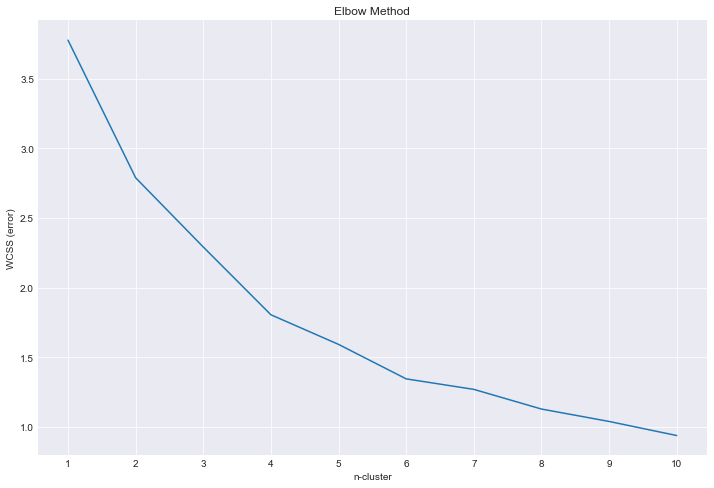

In [55]:
clustering_df = merged_avg.drop(columns=['Neighbourhood'])

# wedding cluster sum of square or wcss (Elbow method)
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=0, init = 'k-means++')
    kmeans.fit(clustering_df)
    wcss.append(kmeans.inertia_)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method'), plt.xlabel('n-cluster'), plt.ylabel('WCSS (error)'),plt.xticks(range(1,11))
plt.show()

In [56]:
# The best n-cluster is at n = 4. Therefore, let's create the kmeans clustering model with n=6

kmeans = KMeans(n_clusters=4,random_state=1, init = 'k-means++')
kmeans.fit(clustering_df)
y = kmeans.labels_
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
new_df = df1.sort_values(['Neighbourhood'],ascending = 1).reset_index(drop=True)
new_df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568
1,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
2,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191
3,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420
5,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049
8,M6G,Downtown Toronto,Christie,43.669542,-79.422564
9,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160


In [58]:
new_df['Cluster Label'] = y
new_df

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Label
0,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0
1,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0
2,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,0
3,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,0
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,0
5,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,0
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0
7,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,0
8,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0
9,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0


###  Let's merge the above df with the top10 most common venue df

In [59]:
final_merged_df = new_df.merge(final_df,on=['Neighbourhood'])
final_merged_df

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Label,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0,Coffee Shop,Café,Steakhouse,Thai Restaurant,Restaurant,Bar,Cosmetics Shop,Bakery,Asian Restaurant,Pizza Place
1,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Cheese Shop,Steakhouse,Café,Farmers Market,Bakery,Restaurant
2,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,0,Breakfast Spot,Café,Coffee Shop,Gym,Intersection,Stadium,Nightclub,Furniture / Home Store,Bar,Climbing Gym
3,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,0,Comic Shop,Auto Workshop,Recording Studio,Restaurant,Farmers Market,Fast Food Restaurant,Skate Park,Burrito Place,Brewery,Pizza Place
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,0,Airport Lounge,Airport Service,Airport Terminal,Sculpture Garden,Airport,Boutique,Boat or Ferry,Bar,Coffee Shop,Harbor / Marina
5,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,0,Coffee Shop,Café,Pizza Place,Bakery,Pub,Restaurant,Italian Restaurant,Chinese Restaurant,Convenience Store,Liquor Store
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Italian Restaurant,Café,Japanese Restaurant,Juice Bar,Burger Joint,Sandwich Place,Ice Cream Shop,Salad Place,Bakery
7,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,0,Café,Vietnamese Restaurant,Bar,Chinese Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Mexican Restaurant,Bakery,Grocery Store
8,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0,Grocery Store,Café,Park,Gas Station,Restaurant,Italian Restaurant,Candy Store,Baby Store,Nightclub,Coffee Shop
9,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Restaurant,Gay Bar,Sushi Restaurant,Café,Fast Food Restaurant,Burger Joint,Gastropub,Hotel


### Let's create a map and show the clusters

In [60]:
m = folium.Map(location = [43.651890,-79.381710],zoom_start = 12.2)

for i in range(0,39):
    lat = final_merged_df.iloc[i,3]
    lng = final_merged_df.iloc[i,4]
    cluster = final_merged_df.iloc[i,5]
    
    if cluster == 0:
        clr = 'red'
    elif cluster == 1:
        clr = 'green'
    elif cluster == 2:
        clr = 'yellow'
    else :
        clr = 'blue'

    folium.CircleMarker(location = [lat,lng], fill=True, fill_color = clr, color = clr, radius = 8,
                 popup = final_merged_df.iloc[i,1],fill_opacity=0.5).add_to(m)
    
m

In [61]:
list(dict.fromkeys(final_merged_df.iloc[:,5]))

[0, 3, 1, 2]

### Let's examine each cluster

In [62]:
cluster0 = final_merged_df.loc[final_merged_df['Cluster Label'] == 0]
cluster0

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Label,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
0,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0,Coffee Shop,Café,Steakhouse,Thai Restaurant,Restaurant,Bar,Cosmetics Shop,Bakery,Asian Restaurant,Pizza Place
1,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Cheese Shop,Steakhouse,Café,Farmers Market,Bakery,Restaurant
2,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,0,Breakfast Spot,Café,Coffee Shop,Gym,Intersection,Stadium,Nightclub,Furniture / Home Store,Bar,Climbing Gym
3,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,0,Comic Shop,Auto Workshop,Recording Studio,Restaurant,Farmers Market,Fast Food Restaurant,Skate Park,Burrito Place,Brewery,Pizza Place
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,0,Airport Lounge,Airport Service,Airport Terminal,Sculpture Garden,Airport,Boutique,Boat or Ferry,Bar,Coffee Shop,Harbor / Marina
5,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,0,Coffee Shop,Café,Pizza Place,Bakery,Pub,Restaurant,Italian Restaurant,Chinese Restaurant,Convenience Store,Liquor Store
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Italian Restaurant,Café,Japanese Restaurant,Juice Bar,Burger Joint,Sandwich Place,Ice Cream Shop,Salad Place,Bakery
7,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,0,Café,Vietnamese Restaurant,Bar,Chinese Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Mexican Restaurant,Bakery,Grocery Store
8,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0,Grocery Store,Café,Park,Gas Station,Restaurant,Italian Restaurant,Candy Store,Baby Store,Nightclub,Coffee Shop
9,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Restaurant,Gay Bar,Sushi Restaurant,Café,Fast Food Restaurant,Burger Joint,Gastropub,Hotel


In [63]:
cluster1 = final_merged_df.loc[final_merged_df['Cluster Label'] == 1]
cluster1

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Label,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
24,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.38316,1,Playground,Summer Camp,Music Venue,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant


In [64]:
cluster2 = final_merged_df.loc[final_merged_df['Cluster Label'] == 2]
cluster2

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Label,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
29,M5N,Central Toronto,Roselawn,43.711695,-79.416936,2,Garden,Afghan Restaurant,New American Restaurant,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant


In [65]:
cluster3 = final_merged_df.loc[final_merged_df['Cluster Label'] == 3]
cluster3

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Label,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
17,M5P,Central Toronto,"Forest Hill North, Forest Hill West",43.696948,-79.411307,3,Park,Jewelry Store,Trail,Sushi Restaurant,Afghan Restaurant,Museum,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant
28,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,3,Park,Playground,Trail,Music Venue,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
